## Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
sns.set(color_codes=True)
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_excel("Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')

In [3]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
df.rename(columns={'economic.cond.national':'Economic_Condtn_National','economic.cond.household':'Economic_Condtn_Household','political.knowledge':'Political_Knowledge','age':'Age','gender':'Gender','vote':'Vote'},inplace=True)

In [7]:
df.Political_Knowledge=df.Political_Knowledge.astype('object')

In [8]:
df.describe().round(2)

,Age,Economic_Condtn_National,Economic_Condtn_Household,Blair,Hague,Europe
count,1525.00,1525.00,1525.00,1525.00,1525.00,1525.00
mean,54.18,3.25,3.14,3.33,2.75,6.73
std,15.71,0.88,0.93,1.17,1.23,3.30
min,24.00,1.00,1.00,1.00,1.00,1.00
25%,41.00,3.00,3.00,2.00,2.00,4.00
50%,53.00,3.00,3.00,4.00,2.00,6.00
75%,67.00,4.00,4.00,4.00,4.00,10.00
max,93.00,5.00,5.00,5.00,5.00,11.00


<AxesSubplot:>

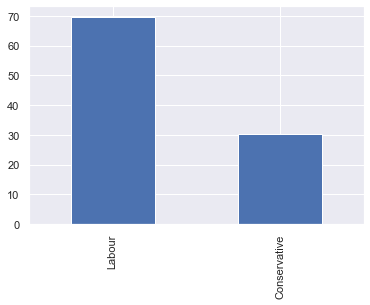

In [9]:
(df.Vote.value_counts(normalize=True)*100).plot(kind='bar')

In [10]:
df.isnull().sum()

Vote                         0
Age                          0
Economic_Condtn_National     0
Economic_Condtn_Household    0
Blair                        0
Hague                        0
Europe                       0
Political_Knowledge          0
Gender                       0
dtype: int64

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 8
(1525, 9)


In [12]:
df=df.drop_duplicates()

In [13]:
def bivariateAnalysis_categorical(column):
    
    plt.figure(figsize=(10,6))
    sns.set(font_scale=1)
    print("Countplot of " + column)
    print("----------------------------------------------------------------------------")
    a=sns.countplot(data = df_ct, x = df_ct[column])
    for bar in a.patches:
            a.annotate(format(bar.get_height(),'.1f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=10,xytext=(0,8),textcoords='offset pixels')
            a.spines['top'].set_visible(False)
            a.spines['right'].set_visible(False)
    plt.tight_layout
    plt.show()
    
    plt.figure(figsize=(10,6))
    print("Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(data = df_ct, x=df_ct[column],y=df_ct['Age'],)
    plt.show()   

In [14]:
df.columns

Index(['Vote', 'Age', 'Economic_Condtn_National', 'Economic_Condtn_Household',
       'Blair', 'Hague', 'Europe', 'Political_Knowledge', 'Gender'],
      dtype='object')

In [15]:
lstcatcolumns=['Europe', 'Political_Knowledge']
len(lstcatcolumns)

2

In [16]:
df_ct=df.copy()
for col in lstcatcolumns:
    df_ct[col]=pd.Categorical(df_ct[col])

In [17]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Vote                       1517 non-null   object  
 1   Age                        1517 non-null   int64   
 2   Economic_Condtn_National   1517 non-null   int64   
 3   Economic_Condtn_Household  1517 non-null   int64   
 4   Blair                      1517 non-null   int64   
 5   Hague                      1517 non-null   int64   
 6   Europe                     1517 non-null   category
 7   Political_Knowledge        1517 non-null   category
 8   Gender                     1517 non-null   object  
dtypes: category(2), int64(5), object(2)
memory usage: 98.4+ KB


Countplot of Europe
----------------------------------------------------------------------------


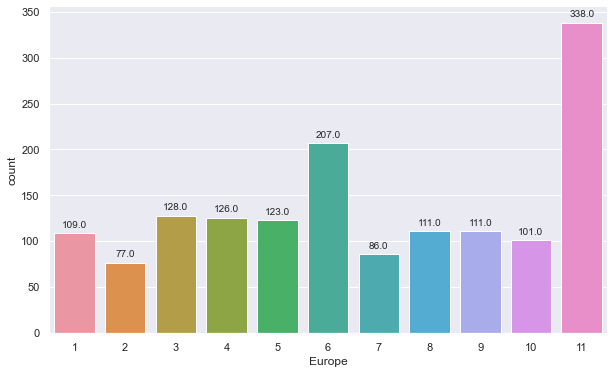

Boxplot of Europe
----------------------------------------------------------------------------


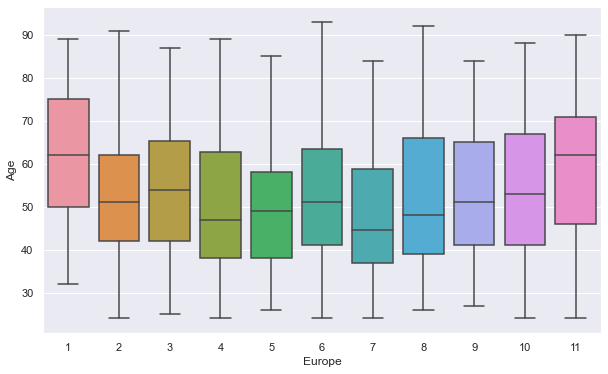

Countplot of Political_Knowledge
----------------------------------------------------------------------------


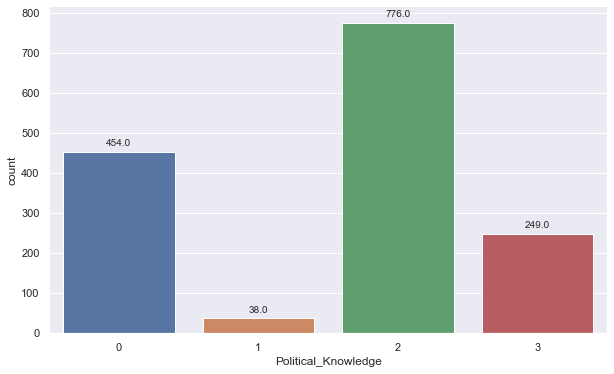

Boxplot of Political_Knowledge
----------------------------------------------------------------------------


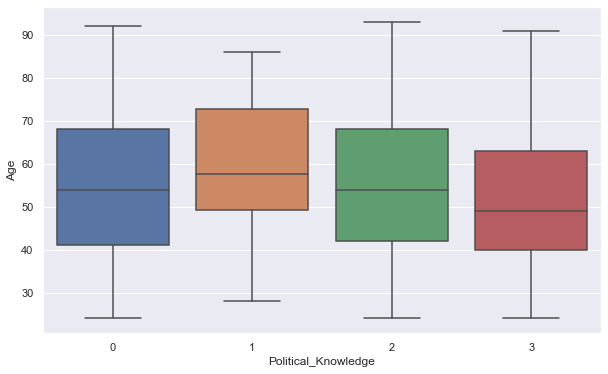

In [18]:
for x in lstcatcolumns:
    bivariateAnalysis_categorical(x)

In [19]:
df_cont=df.select_dtypes(exclude='object')


In [20]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_skew)  =plt.subplots(nrows=2,gridspec_kw = {"height_ratios": (2, 2)},figsize=(10, 7))
    
    sns.set_theme(style="white")
    fig.suptitle("DISTRIBUTION AND OUTLIERS OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(data, orient='h',color="#d3d3d3",ax=ax_box)
    ax_box.set(xlabel='')

    
    sns.despine(top=True,right=True,left=True) 
    sns.distplot(data, color="m",ax=ax_skew,label="Skewness : %.2f"%(data.skew()))
    ax_skew.legend(loc="best")
    plt.show()
    

In [21]:
df_cont.columns

Index(['Age', 'Economic_Condtn_National', 'Economic_Condtn_Household', 'Blair',
       'Hague', 'Europe'],
      dtype='object')

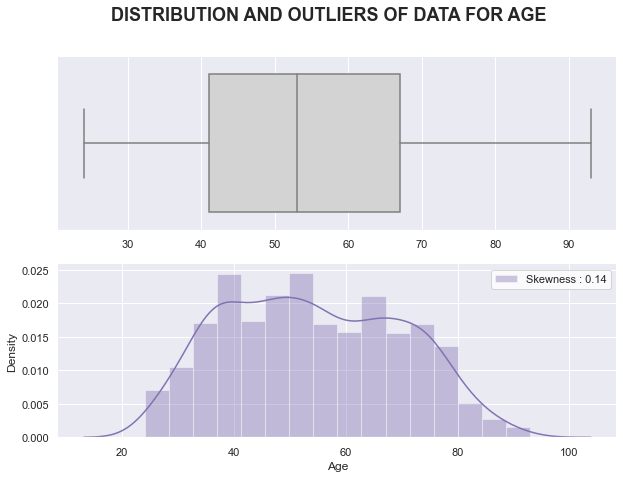

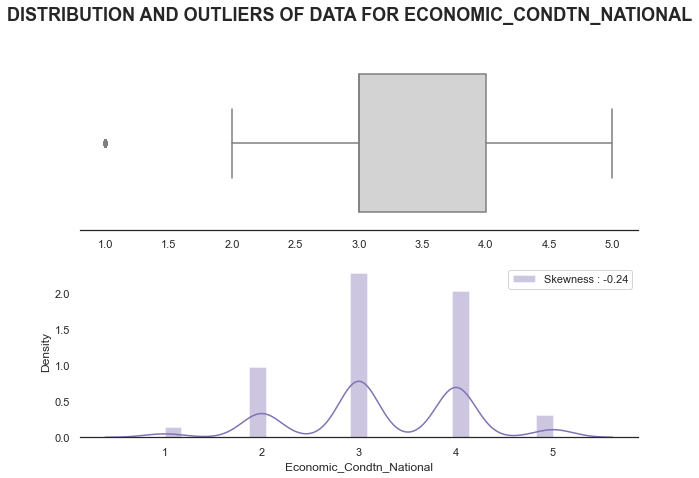

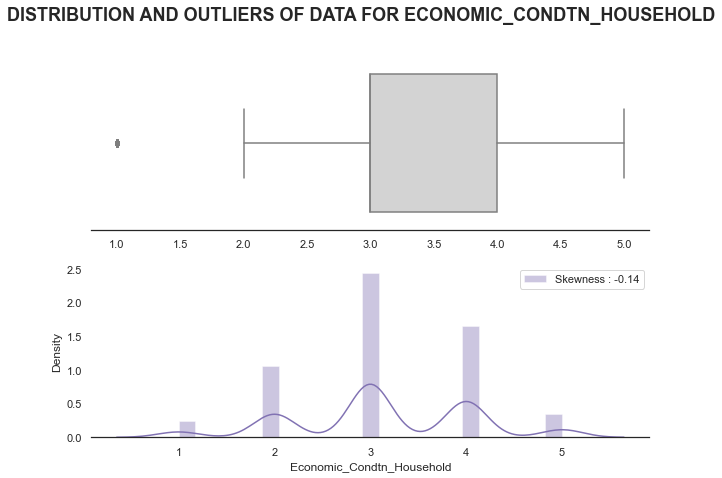

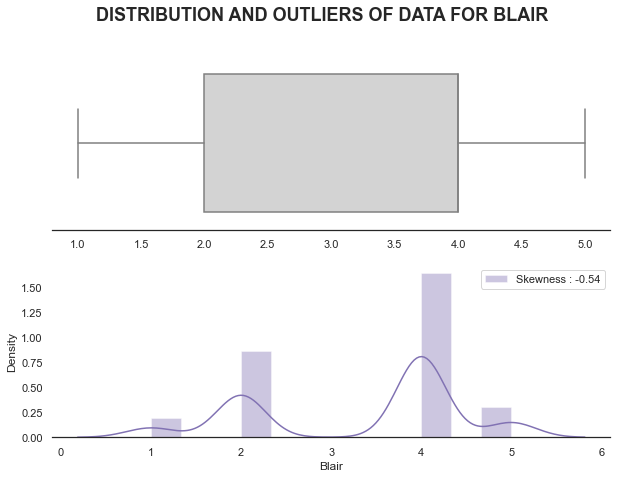

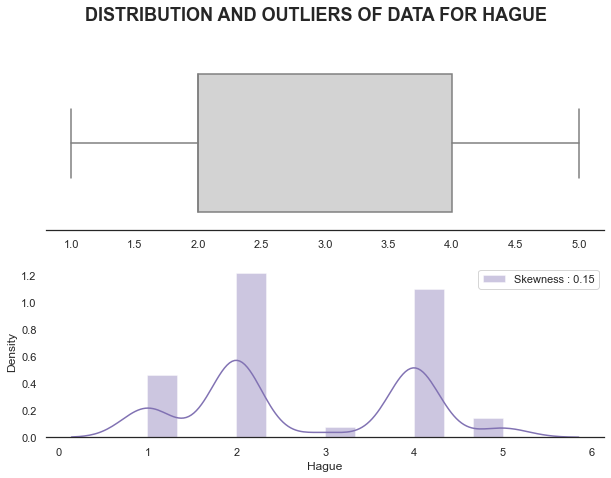

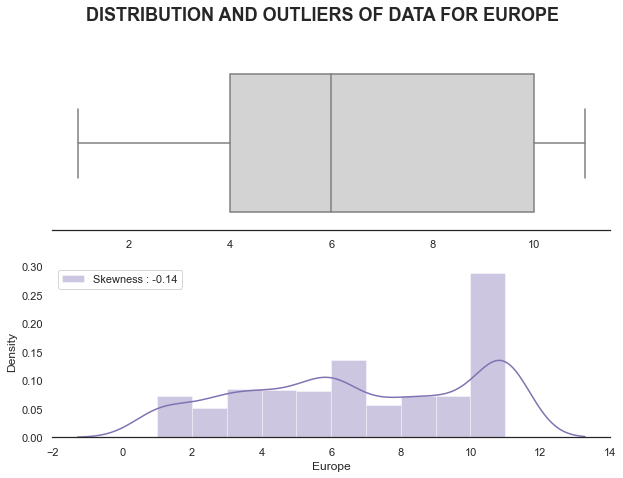

In [22]:
list_col=  ['Age', 'Economic_Condtn_National', 'Economic_Condtn_Household', 'Blair',
       'Hague', 'Europe']
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

In [23]:
def outliers(data):
        outliers_num = data.loc[:,data.columns != 'class']
        Q1 = outliers_num.quantile(0.25)
        Q3 =  outliers_num.quantile(0.75)
        IQR = Q3-Q1
        count = 0
        
        outliers_num_test = ((outliers_num <(Q1-1.5 * IQR)) | (outliers_num > (Q3+1.5 * IQR)))
        for col in outliers_num_test:
            if(1 in outliers_num_test[col].value_counts().index):
                print ("No. of outliers in %s: %d"% (col,outliers_num_test[col].value_counts().iloc[1]))
                count +=1
        print("\n\nNo of attributes with outliers are :", count)
outliers(df)

No. of outliers in Economic_Condtn_Household: 65
No. of outliers in Economic_Condtn_National: 37


No of attributes with outliers are : 2


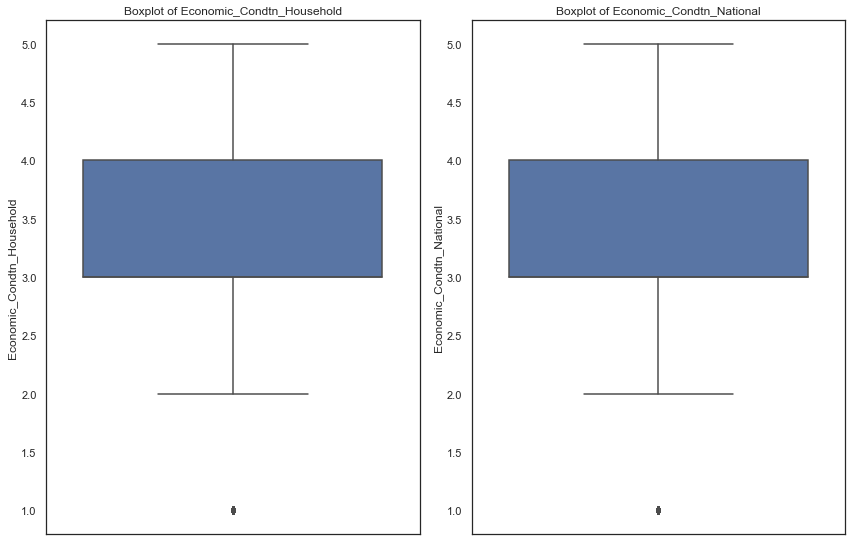

In [24]:
#Checking the outliers
plt.figure(figsize = (12,15))
feature_list = ['Economic_Condtn_Household', 'Economic_Condtn_National']
for i in range(len(feature_list)):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [25]:
def swarm(column):
    
    plt.figure(figsize=(10,6))
    sns.set(font_scale=1)
    print("Swarmplot of " + column)
    print("----------------------------------------------------------------------------")
    a=sns.swarmplot(data=df,x=df[column], y='Age')
    plt.tight_layout
    plt.show()




In [26]:
lstsw=['Gender','Vote']

Swarmplot of Gender
----------------------------------------------------------------------------


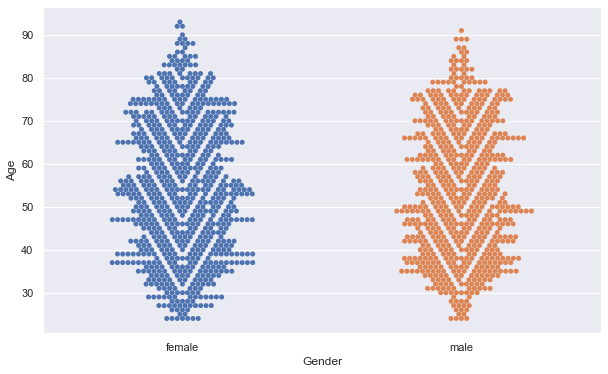

Swarmplot of Vote
----------------------------------------------------------------------------


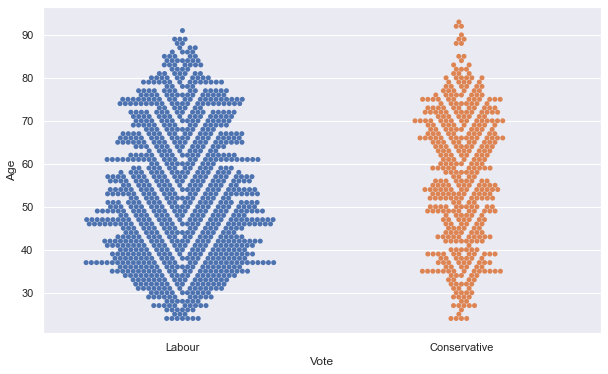

In [27]:
for x in lstsw:
    swarm(x)

Text(0.5, 1.0, 'Countplot of respondents attitudes toward European integration')

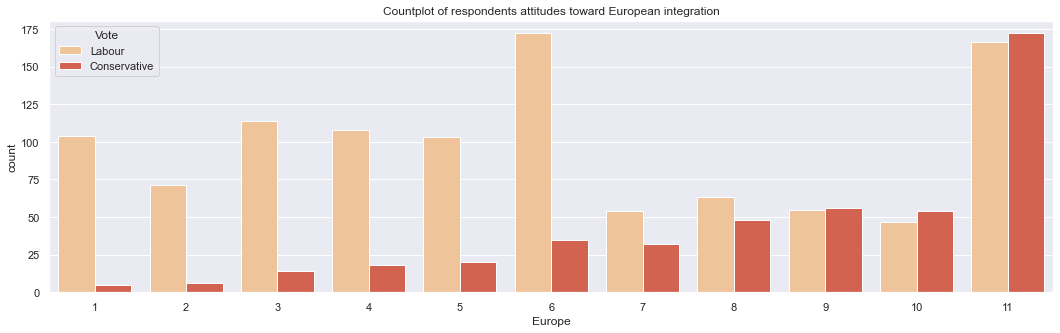

In [28]:
plt.figure(figsize=(18,5))
sns.countplot('Europe',data=df,hue='Vote',palette='OrRd')
plt.title('Countplot of respondents attitudes toward European integration') 

Text(0.5, 1.0, "Countplot of Knowledge of parties' positions on European integration")

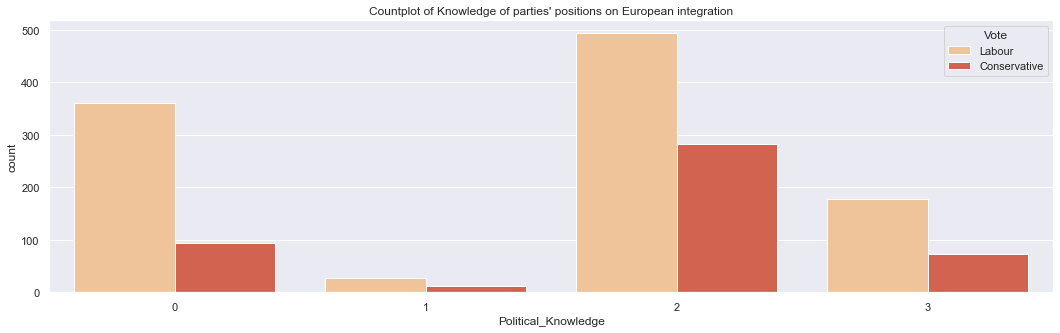

In [29]:
plt.figure(figsize=(18,5))
sns.countplot('Political_Knowledge',data=df,hue='Vote',palette='OrRd')
plt.title("Countplot of Knowledge of parties' positions on European integration") 

Text(0.5, 1.0, 'Countplot of Assessment of current national economic conditions')

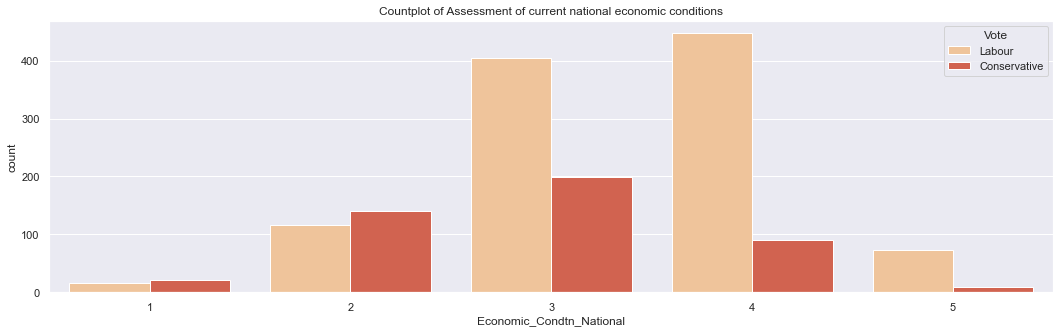

In [30]:
plt.figure(figsize=(18,5))
sns.countplot('Economic_Condtn_National',data=df,hue='Vote',palette='OrRd')
plt.title("Countplot of Assessment of current national economic conditions") 


Text(0.5, 1.0, 'Countplot of Assessment of current household economic conditions')

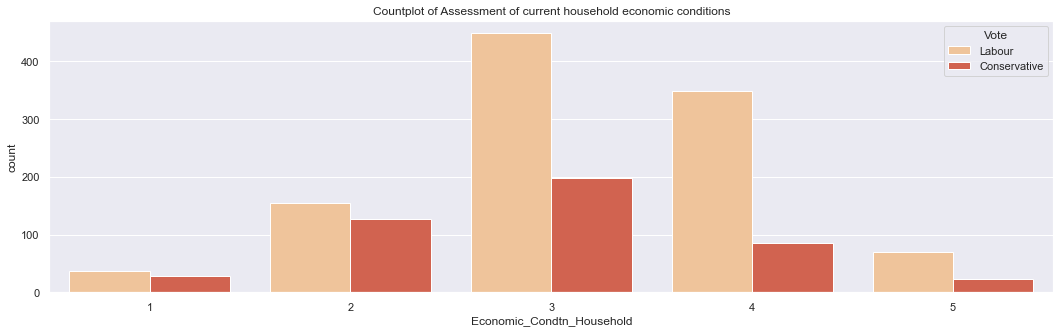

In [31]:
plt.figure(figsize=(18,5))
sns.countplot('Economic_Condtn_Household',data=df,hue='Vote',palette='OrRd')
plt.title("Countplot of Assessment of current household economic conditions") 

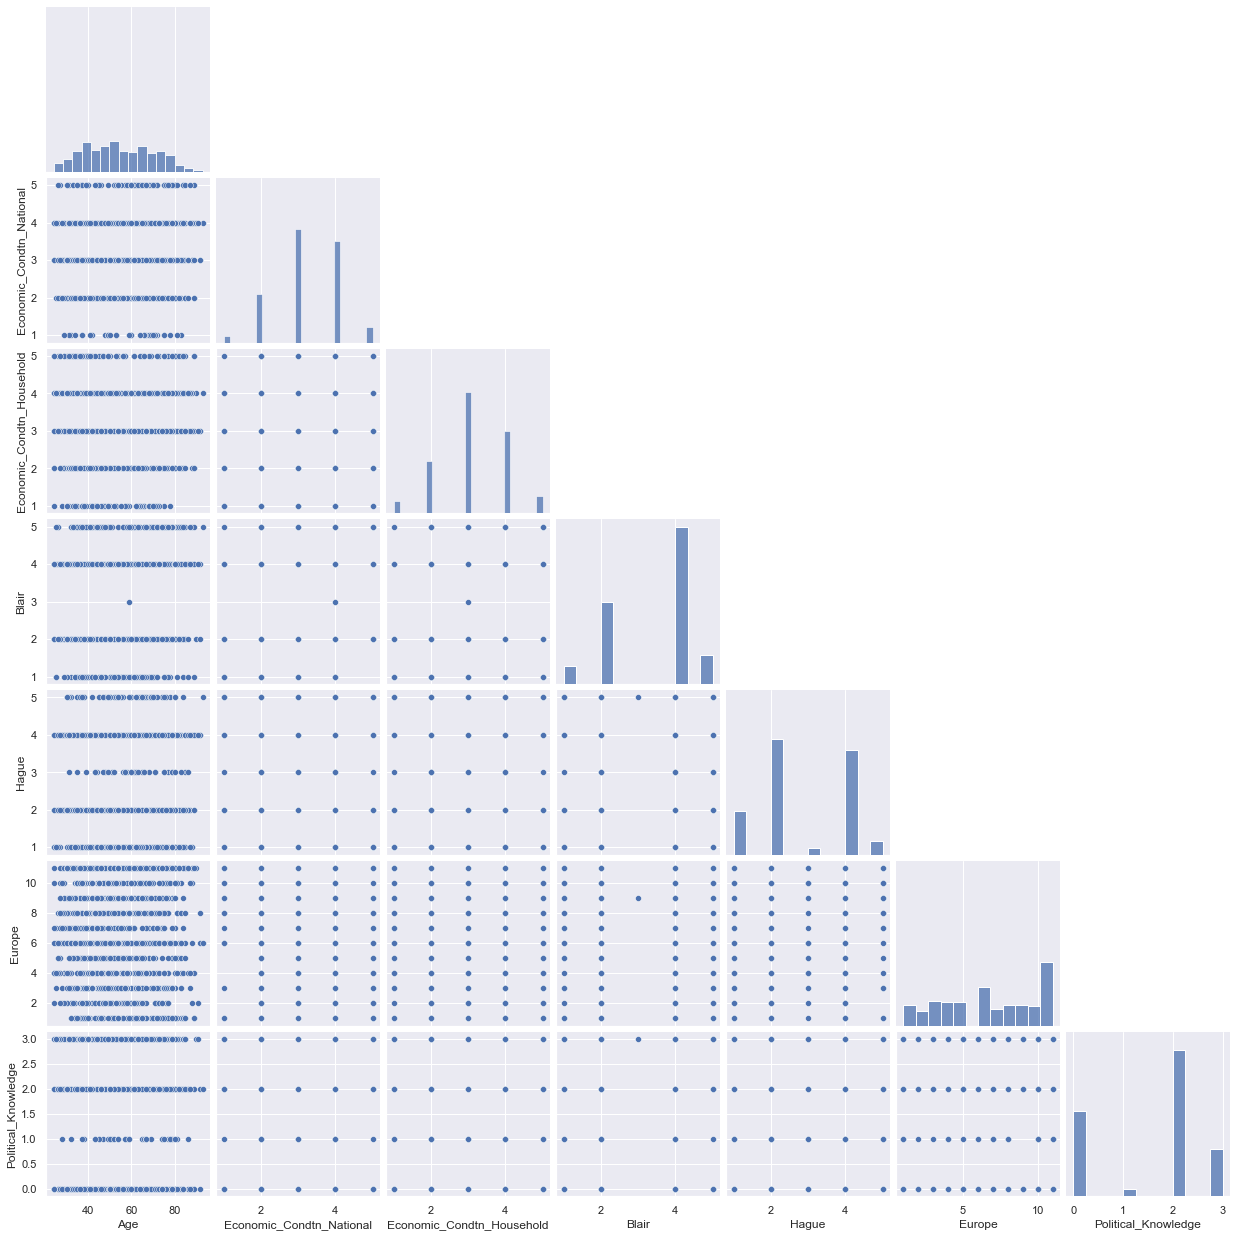

In [32]:
sns.pairplot(df,palette='Set1',corner=True)

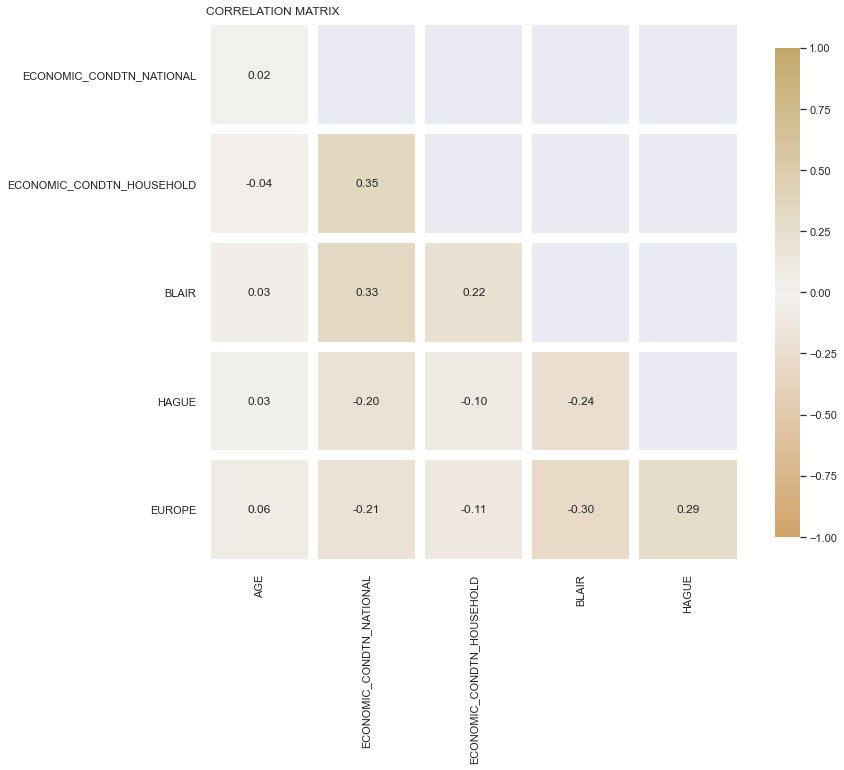

In [33]:
corr=df.corr()

items = df[df.columns[:df.columns.size]]
items_corr=items.corr()


fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(items_corr, dtype=bool))
mask = mask[1:, :-1]
corr = items.corr().iloc[1:,:-1].copy()

cmap1 = sns.diverging_palette(51,65, 62,70, as_cmap=True)

_=sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=9, cmap=cmap1, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .9}, square=False)
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0
           
          )
plt.xticks(plt.xticks()[0], labels=xticks,rotation=90)
title = 'CORRELATION MATRIX';
plt.title(title, fontsize=12,loc='left');





### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test

In [34]:
df.head()

,Vote,Age,Economic_Condtn_National,Economic_Condtn_Household,Blair,Hague,Europe,Political_Knowledge,Gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [35]:
df.Vote=pd.Categorical(df.Vote).codes
df.Gender=pd.Categorical(df.Gender).codes

In [36]:
df.head()

,Vote,Age,Economic_Condtn_National,Economic_Condtn_Household,Blair,Hague,Europe,Political_Knowledge,Gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [37]:
Political_Knowledge=pd.get_dummies(df.Political_Knowledge,prefix='Political_Kwldg')

In [38]:
df=df.join(Political_Knowledge)

In [39]:
df.drop('Political_Knowledge',axis=1,inplace=True)

In [40]:
df.sample(5)

,Vote,Age,Economic_Condtn_National,Economic_Condtn_Household,Blair,Hague,Europe,Gender,Political_Kwldg_0,Political_Kwldg_1,Political_Kwldg_2,Political_Kwldg_3
564,1,40,3,3,2,4,6,0,0,0,1,0
535,1,52,4,2,4,2,4,1,0,0,0,1
227,1,33,3,3,4,4,5,0,0,0,1,0
1232,1,40,5,5,5,1,3,1,0,0,0,1
677,1,47,3,3,4,2,11,1,1,0,0,0


In [41]:
X = df.drop(columns=['Vote','Age'],axis=1)
y = df['Vote']


In [42]:
X.head()

,Economic_Condtn_National,Economic_Condtn_Household,Blair,Hague,Europe,Gender,Political_Kwldg_0,Political_Kwldg_1,Political_Kwldg_2,Political_Kwldg_3
0,3,3,4,1,2,0,0,0,1,0
1,4,4,4,4,5,1,0,0,1,0
2,4,4,5,2,3,1,0,0,1,0
3,4,2,2,1,4,0,1,0,0,0
4,2,2,1,1,6,1,0,0,1,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=123)

In [44]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
print (df.shape)

(1061, 10)
(456, 10)
(1061,)
(456,)
(1517, 12)


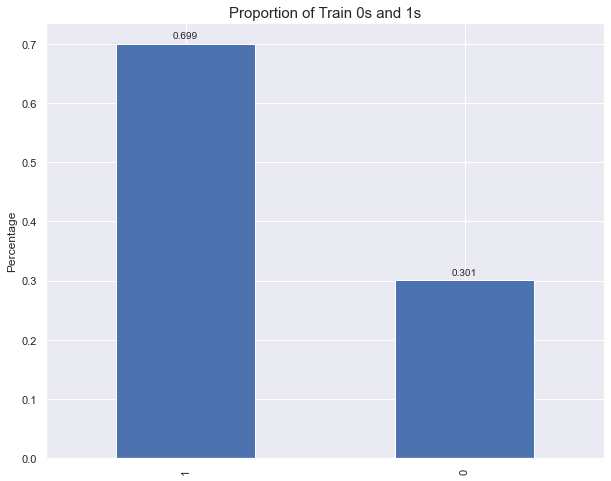

In [45]:
plt.figure(figsize=(10,8))
prop=y_train.value_counts(normalize=True)
prop_plt=prop.plot(kind='bar')
plt.ylabel("Percentage")
plt.title("Proportion of Train 0s and 1s",fontdict={'fontsize':15})
for bar in prop_plt.patches:
            prop_plt.annotate(format(bar.get_height(),'.3f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=10,xytext=(0,8),textcoords='offset pixels')

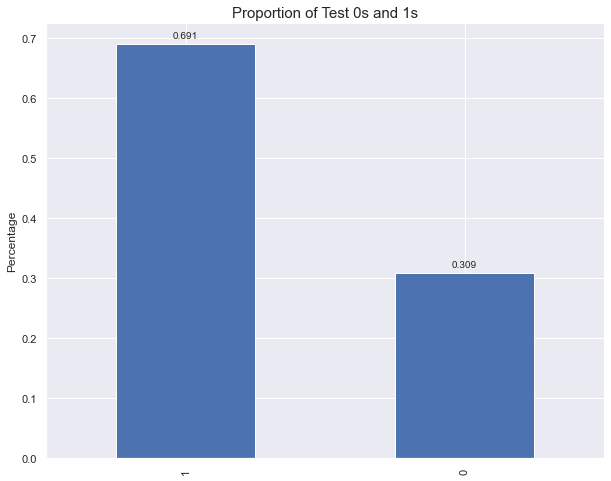

In [46]:
b=y_test.value_counts(normalize=True)

plt.figure(figsize=(10,8))
prop=y_test.value_counts(normalize=True)
prop_plt=prop.plot(kind='bar')
plt.ylabel("Percentage")
plt.title("Proportion of Test 0s and 1s",fontdict={'fontsize':15})
for bar in prop_plt.patches:
            prop_plt.annotate(format(bar.get_height(),'.3f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=10,xytext=(0,8),textcoords='offset pixels')

In [47]:
def perf_metrics_train(best_grid,X_train,y_train):
    ytrain_predict_final=best_grid.predict(X_train)
    best_score = best_grid.score(X_train, y_train)
    print('Training data accuracy score',best_score.round(2))

    print('\n\t\t\bClassification Report - Training data\n',metrics.classification_report(y_train,ytrain_predict_final))

    

   

In [48]:
def perf_metrics_test(best_grid,X_test,y_test):
    ytest_predict_final = best_grid.predict(X_test)
    model_score = best_grid.score(X_test, y_test)
    print('Test data accuracy score  :',model_score.round(2))

    print('\n\nClassification Report - Test data\n',metrics.classification_report(y_test,ytest_predict_final))

    

In [49]:
def roc_cn(best_grid,X_test,y_test): 
    plt.figure(figsize=(10,6))
    
    
    
    
    
    # predict probabilities
    probs = best_grid.predict_proba(X_train)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = metrics.roc_auc_score(y_train, probs)*100
    print('ROC AUC Score - Train: %.1f' % auc.round(2),'%')
    # calculate roc curve
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, probs)
    
    # predict probabilities
    probs = best_grid.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = metrics.roc_auc_score(y_test, probs)*100
    print('ROC AUC Score - Test: %.1f' % auc.round(2),'%')
    # calculate roc curve
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    #plot the roc curve for the best_model
    plt.plot(test_fpr, test_tpr,marker='.',label = 'Testing Data')
    #plt.title('ROC Curve - Test data',fontsize=20)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    #plot the roc curve for the best model
    plt.plot(train_fpr, train_tpr,marker='.',label = 'Training Data')
    #plt.title('ROC Curve - Train data',fontsize=20)
    plt.legend(loc='best')
    plt.show()
    
    ytest_predict_final = best_grid.predict(X_test)
    model_score = best_grid.score(X_test, y_test)
    ytrain_predict_final=best_grid.predict(X_train)
    best_score = best_grid.score(X_train, y_train)
    
    f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (25,8))
    
    
    plot_0=sns.heatmap(metrics.confusion_matrix(y_train, ytrain_predict_final),annot=True, fmt='d',ax=a[0][0], cbar=False,
                xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'],annot_kws={"size": 18})
    a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
    a[0][0].set_title('Confusion Matrix of Training Data')
    
    plot1=sns.heatmap(metrics.confusion_matrix(y_test, ytest_predict_final),annot=True, fmt='d',ax=a[0][1], cbar=False,cmap='RdBu_r',
                xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'],annot_kws={"size": 18})
    a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label")
    a[0][1].set_title('Confusion Matrix of Testing Data')

    
    
 

## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)

In [50]:
# Fit the Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [51]:
perf_metrics_train(model,X_train,y_train)

Training data accuracy score 0.84

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.77      0.65      0.70       319
           1       0.86      0.92      0.89       742

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [52]:
perf_metrics_test(model,X_test,y_test)

Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.75      0.60      0.67       141
           1       0.84      0.91      0.87       315

    accuracy                           0.82       456
   macro avg       0.79      0.76      0.77       456
weighted avg       0.81      0.82      0.81       456



ROC AUC Score - Train: 89.0 %
ROC AUC Score - Test: 88.0 %


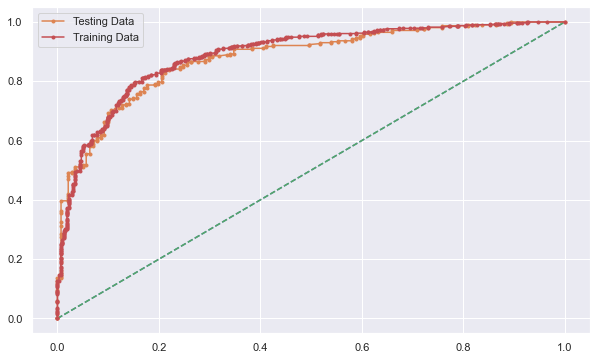

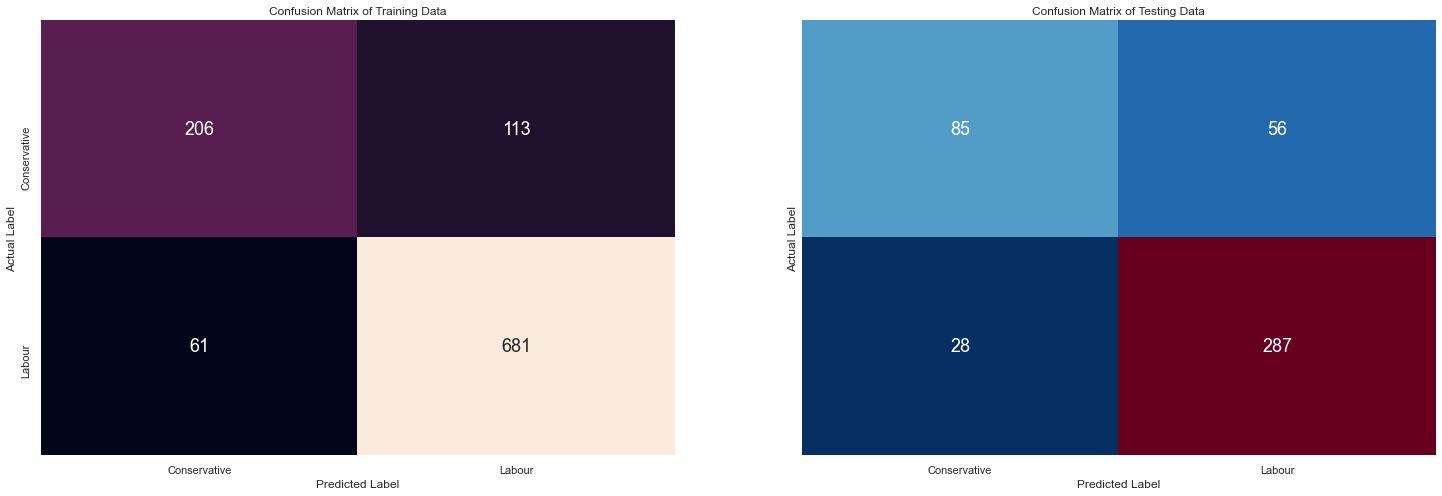

In [53]:
roc_cn(model,X_test,y_test)

### Model Tuning

In [54]:
grid={'penalty':['l2','l1','none'],
      'solver':['liblinear','sag','lbfgs','newton-cg'],
      'tol':[0.01,0.0001],
     'C': [100, 10, 1.0, 0.01]}

In [55]:
lr_model = LogisticRegression(max_iter=1000,n_jobs=-1,C=1
                             )

In [56]:
grid_search = GridSearchCV(estimator = lr_model, param_grid = grid, cv = 2,n_jobs=-1,scoring='f1',)

In [57]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(C=1, max_iter=1000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.01],
                         'penalty': ['l2', 'l1', 'none'],
                         'solver': ['liblinear', 'sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.01, 0.0001]},
             scoring='f1')

In [58]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}

In [59]:
grid_search.best_estimator_

LogisticRegression(C=100, max_iter=1000, n_jobs=-1, solver='liblinear')

In [60]:
best_model = grid_search.best_estimator_

In [61]:
print('Intercept :' ,best_model.intercept_[0] )
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_model.coef_[0][idx]))
    

Intercept : 1.3423489772409822
The coefficient for Economic_Condtn_National is 0.38982967187141404
The coefficient for Economic_Condtn_Household is 0.12606160595969185
The coefficient for Blair is 0.6253461235870424
The coefficient for Hague is -0.8679408430793604
The coefficient for Europe is -0.2141453724858376
The coefficient for Gender is 0.022708748114732415
The coefficient for Political_Kwldg_0 is 0.8304766485657096
The coefficient for Political_Kwldg_1 is 0.8719219283688181
The coefficient for Political_Kwldg_2 is -0.177129857939574
The coefficient for Political_Kwldg_3 is -0.18291974175382367


In [62]:
perf_metrics_train(best_model,X_train,y_train)

Training data accuracy score 0.84

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.77      0.65      0.71       319
           1       0.86      0.92      0.89       742

    accuracy                           0.84      1061
   macro avg       0.82      0.78      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [63]:
perf_metrics_test(best_model,X_test,y_test)

Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.75      0.61      0.67       141
           1       0.84      0.91      0.87       315

    accuracy                           0.82       456
   macro avg       0.80      0.76      0.77       456
weighted avg       0.81      0.82      0.81       456



ROC AUC Score - Train: 89.0 %
ROC AUC Score - Test: 87.9 %


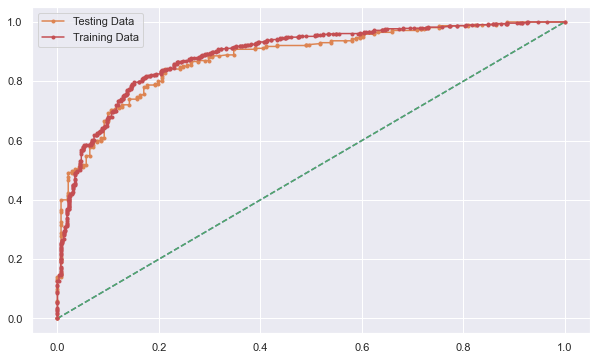

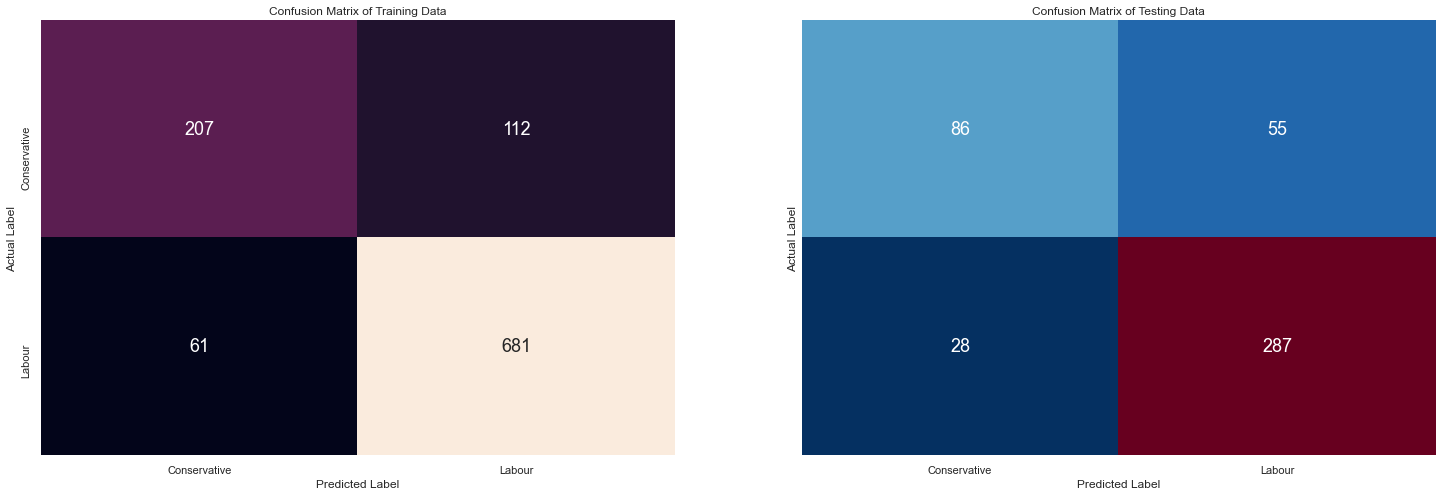

In [64]:
roc_cn(best_model,X_test,y_test)

### LDA

In [65]:
#Build LDA Model
clf = LinearDiscriminantAnalysis(shrinkage=None,priors=None)
model_lda=clf.fit(X_train,y_train)

In [66]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model_lda.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model_lda.predict(X_test)

In [67]:
perf_metrics_train(model_lda,X_train,y_train)

Training data accuracy score 0.84

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.76      0.66      0.71       319
           1       0.86      0.91      0.89       742

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [68]:
perf_metrics_test(model_lda,X_test,y_test)

Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.75      0.65      0.69       141
           1       0.85      0.90      0.88       315

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



ROC AUC Score - Train: 89.0 %
ROC AUC Score - Test: 87.9 %


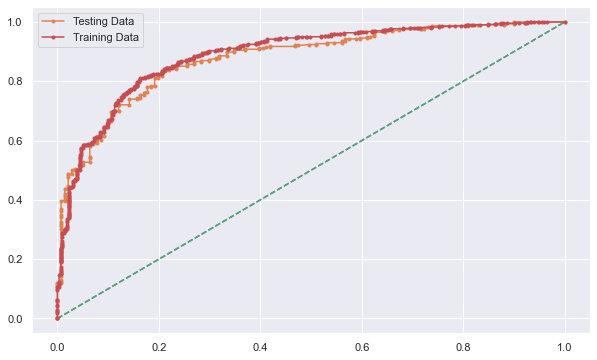

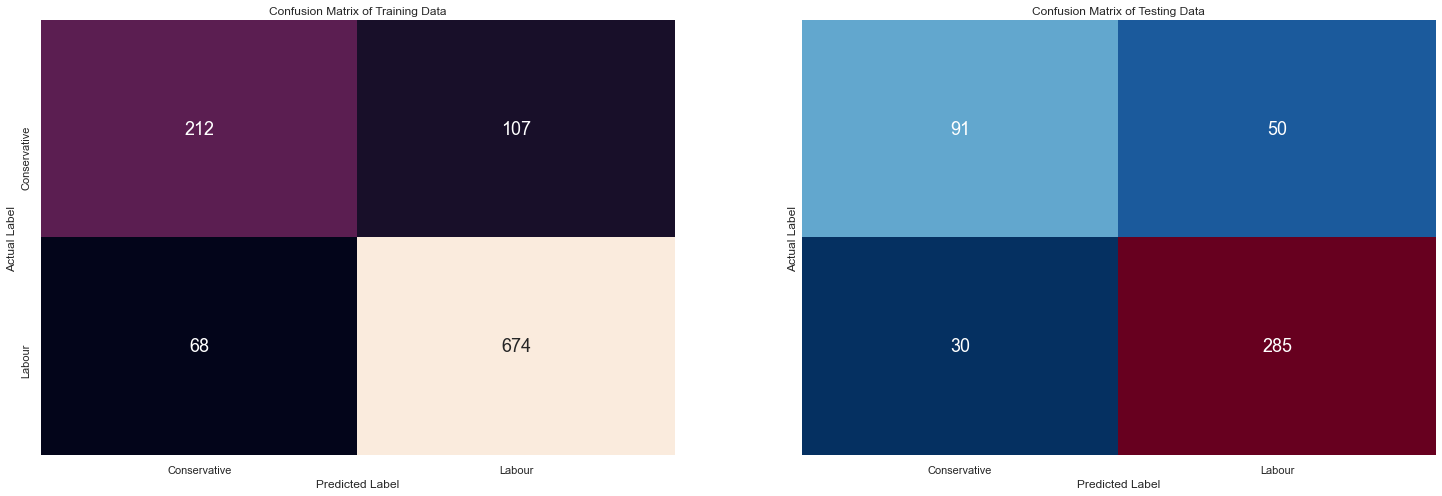

In [69]:
roc_cn(model_lda,X_test,y_test)

In [70]:
estimator_1 = LinearDiscriminantAnalysis(shrinkage='auto',tol=0.0000001)
parameters_1 = {
    'solver': ('lsqr','eigen','svd'), 
    'n_components': (1,5,10),
   
                   }



In [71]:
# with GridSearch
grid_search_lda = GridSearchCV(
    estimator=estimator_1,
    param_grid=parameters_1,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 3,
)




In [72]:
lda=grid_search_lda.fit(X_train, y_train)

In [73]:
grid_search_lda.best_estimator_

LinearDiscriminantAnalysis(n_components=1, shrinkage='auto', solver='lsqr',
                           tol=1e-07)

In [74]:
grid_search_lda.best_params_

{'n_components': 1, 'solver': 'lsqr'}

In [75]:
perf_metrics_train(
    lda,X_train,y_train)

Training data accuracy score 0.84

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       319
           1       0.87      0.91      0.89       742

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [76]:
perf_metrics_test(lda,X_test,y_test)

Test data accuracy score  : 0.83


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.75      0.65      0.70       141
           1       0.85      0.90      0.88       315

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.83      0.82       456



ROC AUC Score - Train: 89.0 %
ROC AUC Score - Test: 87.9 %


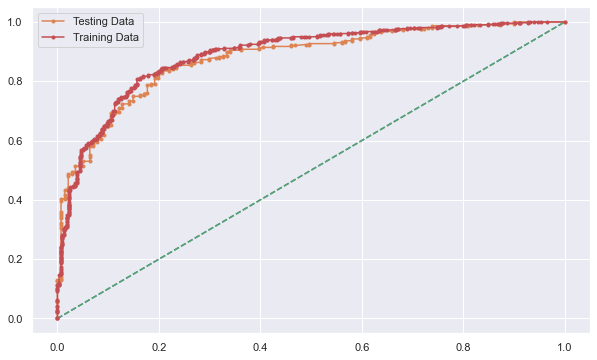

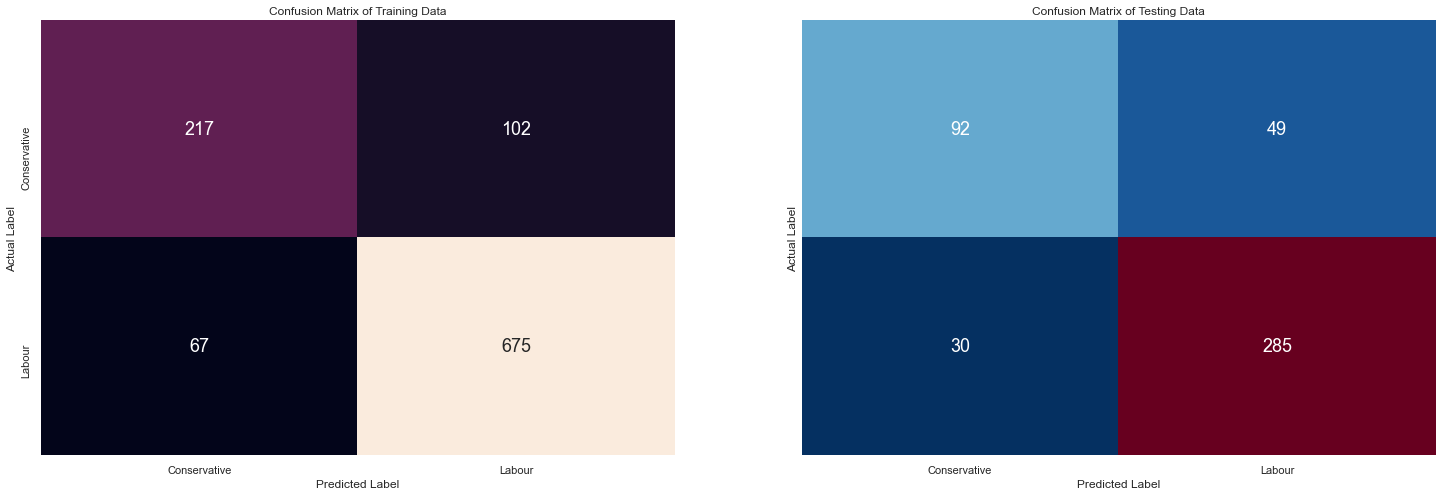

In [77]:
roc_cn(lda,X_test,y_test)

## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [78]:
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train) #scaling the data since KNN is a distance based algorithm.
X_test_scaled=ss.transform(X_test)

In [79]:
model_KNN=KNeighborsClassifier()
model_KNN.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [80]:
perf_metrics_train(model_KNN,X_train,y_train)

Training data accuracy score 0.72

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.79      0.10      0.18       319
           1       0.72      0.99      0.83       742

    accuracy                           0.72      1061
   macro avg       0.75      0.55      0.51      1061
weighted avg       0.74      0.72      0.64      1061



In [81]:
perf_metrics_test(model_KNN,X_test,y_test)

Test data accuracy score  : 0.72


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.88      0.10      0.18       141
           1       0.71      0.99      0.83       315

    accuracy                           0.72       456
   macro avg       0.79      0.55      0.50       456
weighted avg       0.76      0.72      0.63       456



ROC AUC Score - Train: 69.5 %
ROC AUC Score - Test: 70.3 %


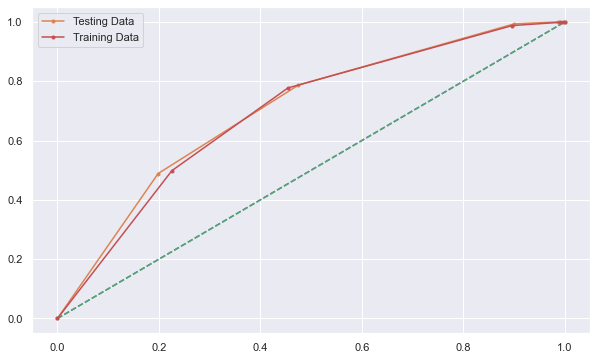

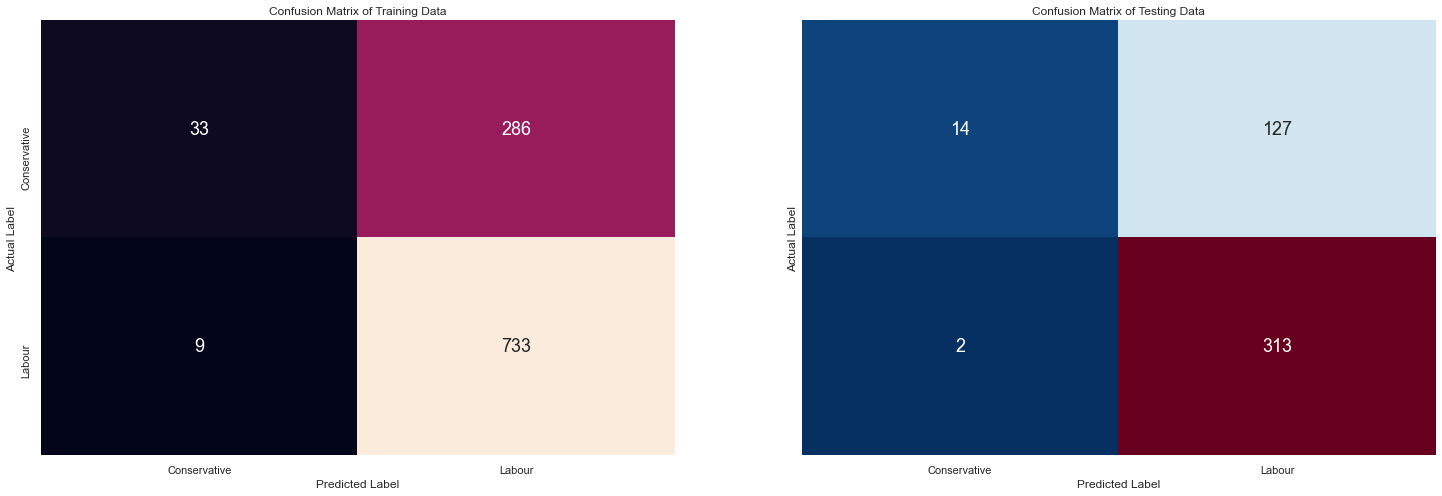

In [82]:
roc_cn(model_KNN,X_test,y_test)

In [83]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2543859649122807,
 0.20175438596491224,
 0.19956140350877194,
 0.1842105263157895,
 0.19298245614035092,
 0.1907894736842105,
 0.1885964912280702,
 0.1885964912280702,
 0.1885964912280702,
 0.19517543859649122]

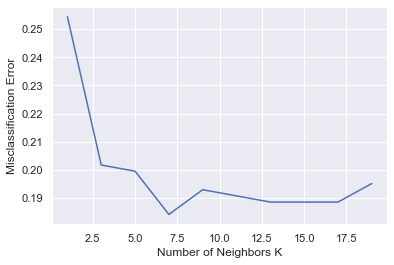

In [84]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [85]:
model_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [86]:
model_KNN.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [87]:
param_grid={'leaf_size':[20,30,40],
           "n_neighbors" : [10,14,18,22],
            "p":[1,2,3],
            
           }


In [88]:
grid_search = GridSearchCV(estimator = model_KNN, param_grid = param_grid, cv = 3,verbose=True,n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [20, 30, 40],
                         'n_neighbors': [10, 14, 18, 22], 'p': [1, 2, 3]},
             verbose=True)

In [89]:
best_grid_KNN=grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.score(X_train_scaled, y_train))

{'leaf_size': 20, 'n_neighbors': 18, 'p': 2}
0.8388312912346843


In [90]:
print(best_grid_KNN)

KNeighborsClassifier(leaf_size=20, n_neighbors=18)


In [91]:
perf_metrics_train(best_grid_KNN,X_train,y_train)

Training data accuracy score 0.71

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.82      0.04      0.08       319
           1       0.71      1.00      0.83       742

    accuracy                           0.71      1061
   macro avg       0.77      0.52      0.46      1061
weighted avg       0.74      0.71      0.60      1061



In [92]:
perf_metrics_test(best_grid_KNN,X_test,y_test)

Test data accuracy score  : 0.7


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.78      0.05      0.09       141
           1       0.70      0.99      0.82       315

    accuracy                           0.70       456
   macro avg       0.74      0.52      0.46       456
weighted avg       0.72      0.70      0.60       456



ROC AUC Score - Train: 81.8 %
ROC AUC Score - Test: 77.0 %


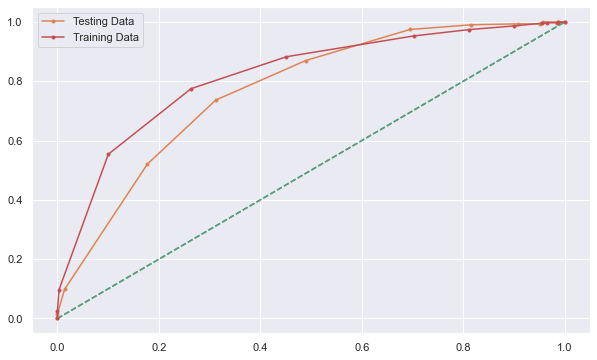

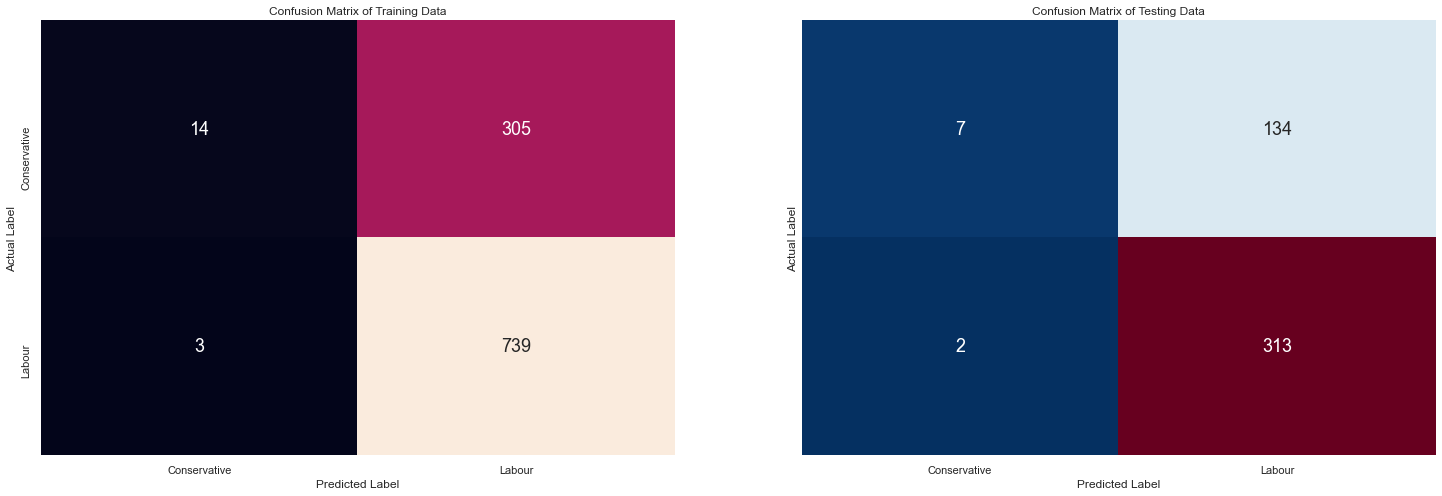

In [93]:
roc_cn(best_grid_KNN,X_test,y_test)

## Naïve Bayes Model

In [94]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
clfGaussian = GaussianNB()
clfGaussian.fit(X_train, y_train)


GaussianNB()

In [95]:
perf_metrics_train(clfGaussian,X_train,y_train)

Training data accuracy score 0.82

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       319
           1       0.87      0.87      0.87       742

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [96]:
perf_metrics_test(clfGaussian,X_test,y_test)

Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.72      0.67      0.69       141
           1       0.86      0.89      0.87       315

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.81      0.82      0.82       456



ROC AUC Score - Train: 88.0 %
ROC AUC Score - Test: 86.6 %


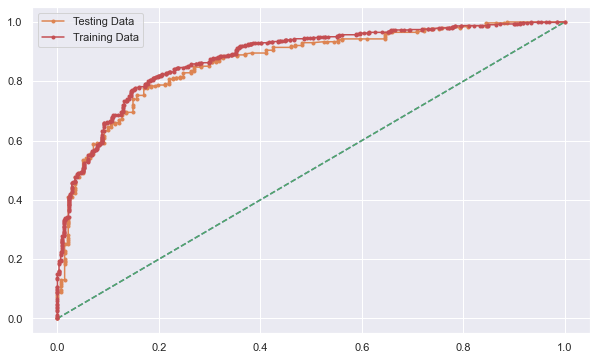

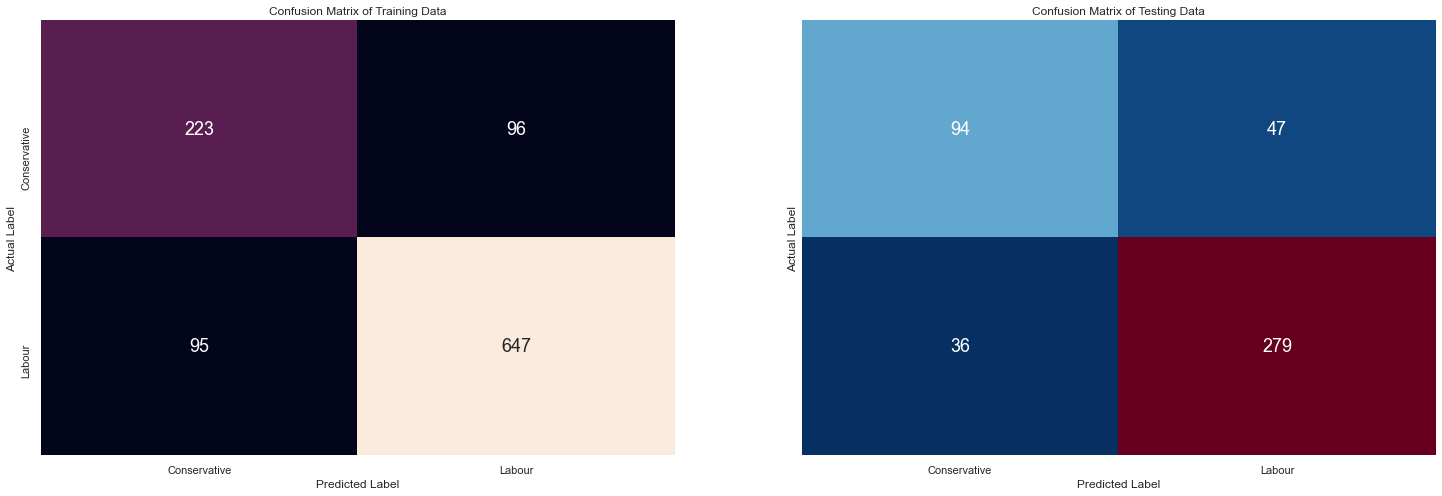

In [97]:
roc_cn(clfGaussian,X_test,y_test)

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting

### RF

In [98]:
#Create a Random Forest Classifier
clfRF=RandomForestClassifier(n_estimators=300,oob_score=True)


In [99]:
clfRF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, oob_score=True)

In [100]:
perf_metrics_train(clfRF,X_train,y_train)

Training data accuracy score 0.97

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       319
           1       0.98      0.98      0.98       742

    accuracy                           0.97      1061
   macro avg       0.96      0.96      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [101]:
perf_metrics_test(clfRF,X_test,y_test)

Test data accuracy score  : 0.78


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       141
           1       0.83      0.85      0.84       315

    accuracy                           0.78       456
   macro avg       0.74      0.73      0.74       456
weighted avg       0.77      0.78      0.77       456



ROC AUC Score - Train: 99.7 %
ROC AUC Score - Test: 84.2 %


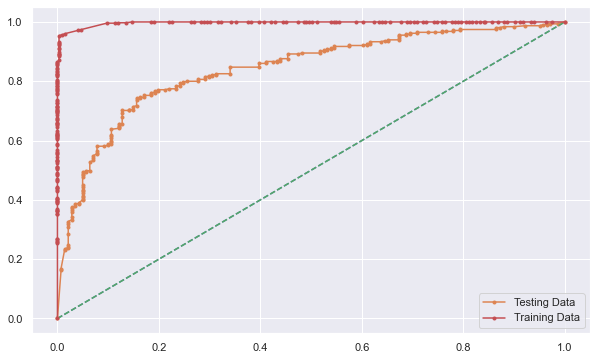

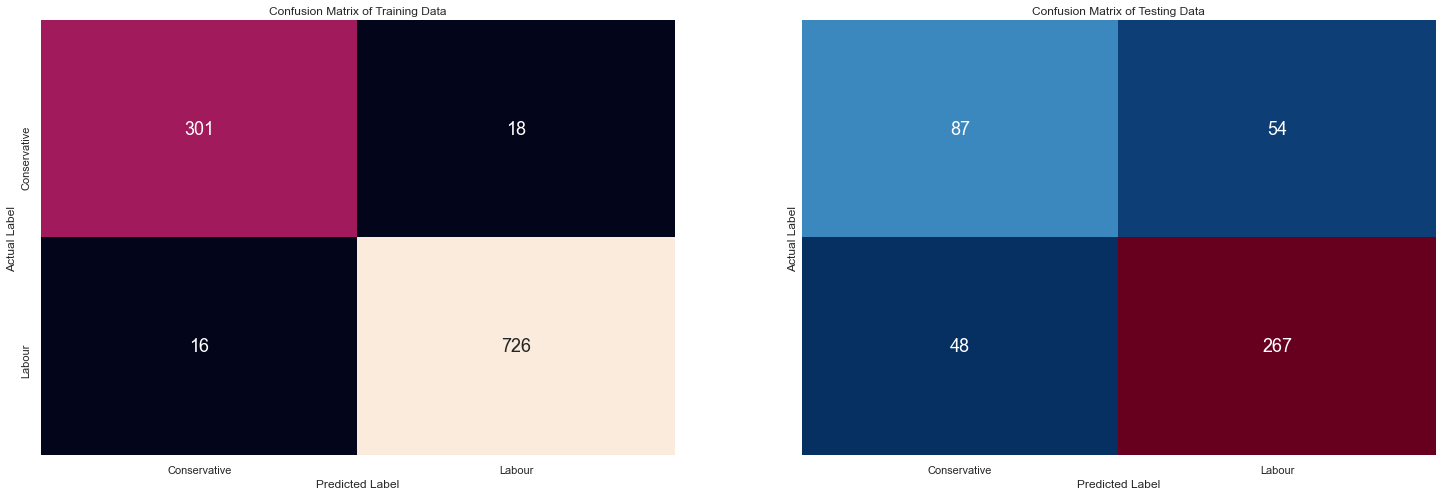

In [102]:
roc_cn(clfRF,X_test,y_test)

### RF Model Tuning

In [103]:
clfRF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [104]:
clfRF.oob_score_

0.8001885014137606

In [105]:
param_grid = {
    'max_depth' : [7,10,13], # 7,10
    'max_features' : [5,6,7], #5
    'min_samples_leaf' : [10,20,30,40], #20,30]
    'criterion' : ['gini','entropy'], #entropy
    'min_samples_split': [30,60],
    'n_estimators': [501,301] #501
}

In [106]:
grid_search = GridSearchCV(estimator = clfRF, param_grid = param_grid, cv = 2,verbose=True,n_jobs=-1)

In [107]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(n_estimators=300, oob_score=True),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 10, 13], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [10, 20, 30, 40],
                         'min_samples_split': [30, 60],
                         'n_estimators': [501, 301]},
             verbose=True)

In [108]:
best_grid_RF = grid_search.best_estimator_
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 13, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 501}


In [109]:
grid_search.score(X_train, y_train).round(3)

0.856

In [110]:
best_grid_RF.oob_score_.round(3)

0.828

In [111]:
perf_metrics_train(best_grid_RF,X_train, y_train)

Training data accuracy score 0.86

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       319
           1       0.88      0.91      0.90       742

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [112]:
perf_metrics_test(best_grid_RF,X_test,y_test)

Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       141
           1       0.85      0.90      0.87       315

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



ROC AUC Score - Train: 92.3 %
ROC AUC Score - Test: 88.3 %


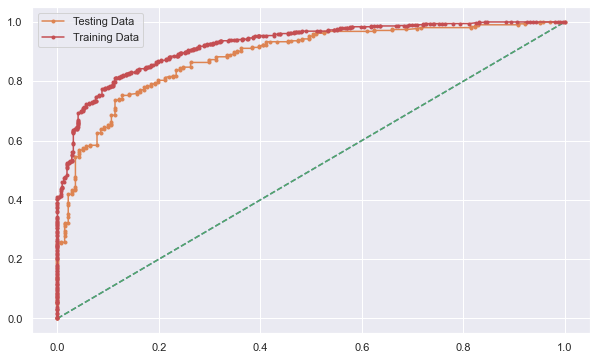

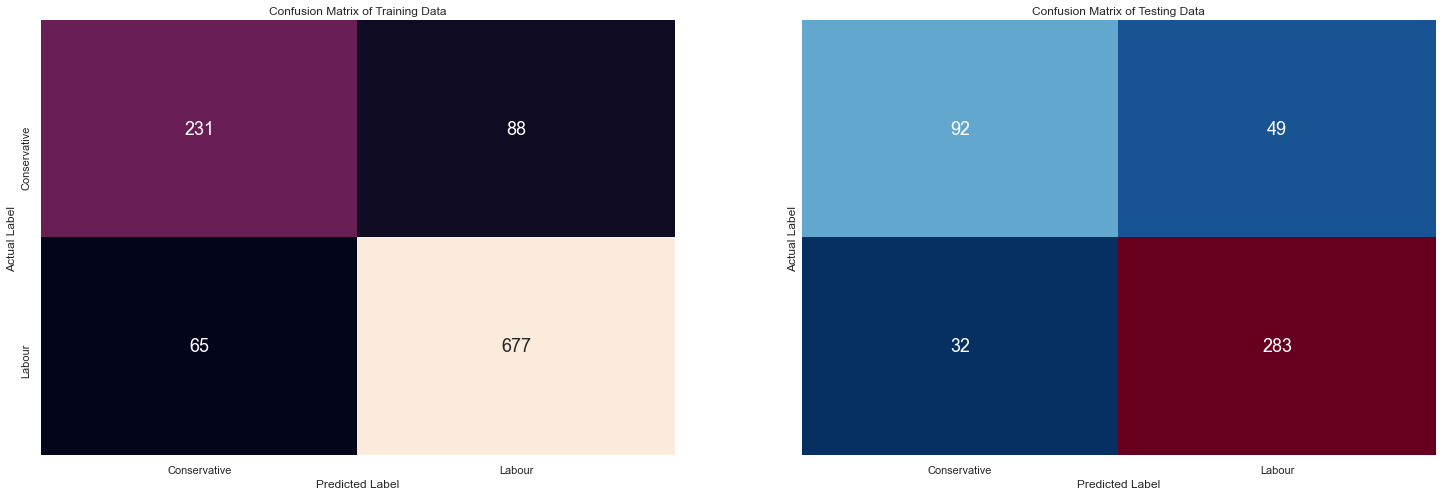

In [113]:
roc_cn(best_grid_RF,X_test,y_test)

### AdaBoost

In [114]:
clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(X_train,y_train)


AdaBoostClassifier(n_estimators=100)

In [115]:

perf_metrics_train(clfADB,X_train,y_train)

Training data accuracy score 0.84

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.76      0.69      0.73       319
           1       0.87      0.91      0.89       742

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [116]:
perf_metrics_test(clfADB,X_test,y_test)

Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       141
           1       0.85      0.90      0.87       315

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



ROC AUC Score - Train: 90.2 %
ROC AUC Score - Test: 86.5 %


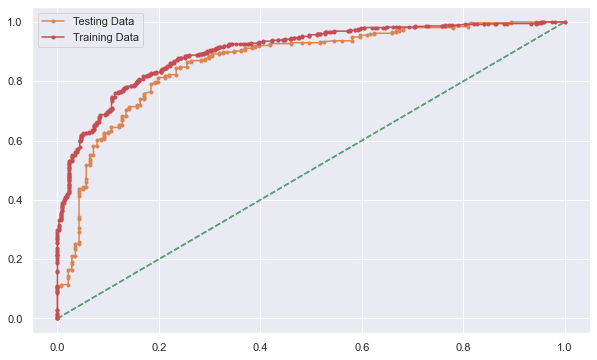

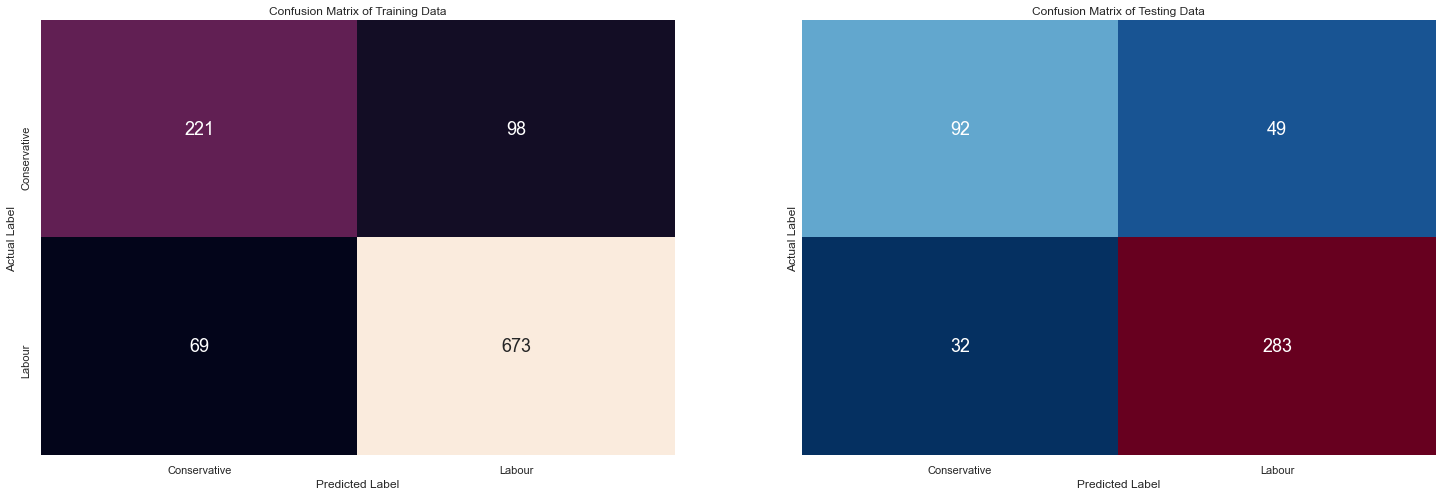

In [117]:
roc_cn(clfADB,X_test,y_test)

In [118]:
pd.DataFrame(clfADB.feature_importances_,index=X_train.columns,columns=['percentage'])

,percentage
Economic_Condtn_National,0.09
Economic_Condtn_Household,0.08
Blair,0.05
Hague,0.11
Europe,0.62
Gender,0.01
Political_Kwldg_0,0.01
Political_Kwldg_1,0.02
Political_Kwldg_2,0.01
Political_Kwldg_3,0.00


### Gradient Boosting

In [119]:
clfGB=GradientBoostingClassifier(random_state=1,learning_rate=0.07)
clfGB.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.07, random_state=1)

In [120]:
perf_metrics_train(clfGB,X_train,y_train)

Training data accuracy score 0.87

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.81      0.74      0.78       319
           1       0.89      0.93      0.91       742

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061



In [121]:
perf_metrics_test(clfGB,X_test,y_test)

Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.75      0.65      0.69       141
           1       0.85      0.90      0.88       315

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



ROC AUC Score - Train: 93.0 %
ROC AUC Score - Test: 88.3 %


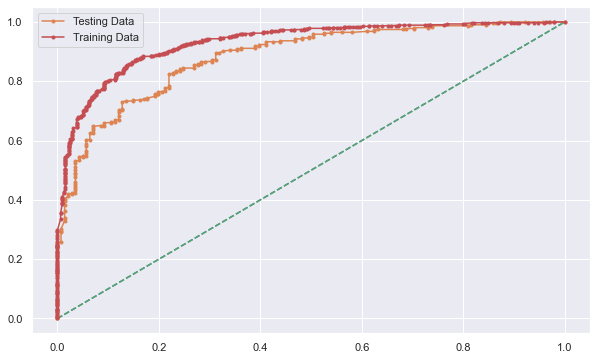

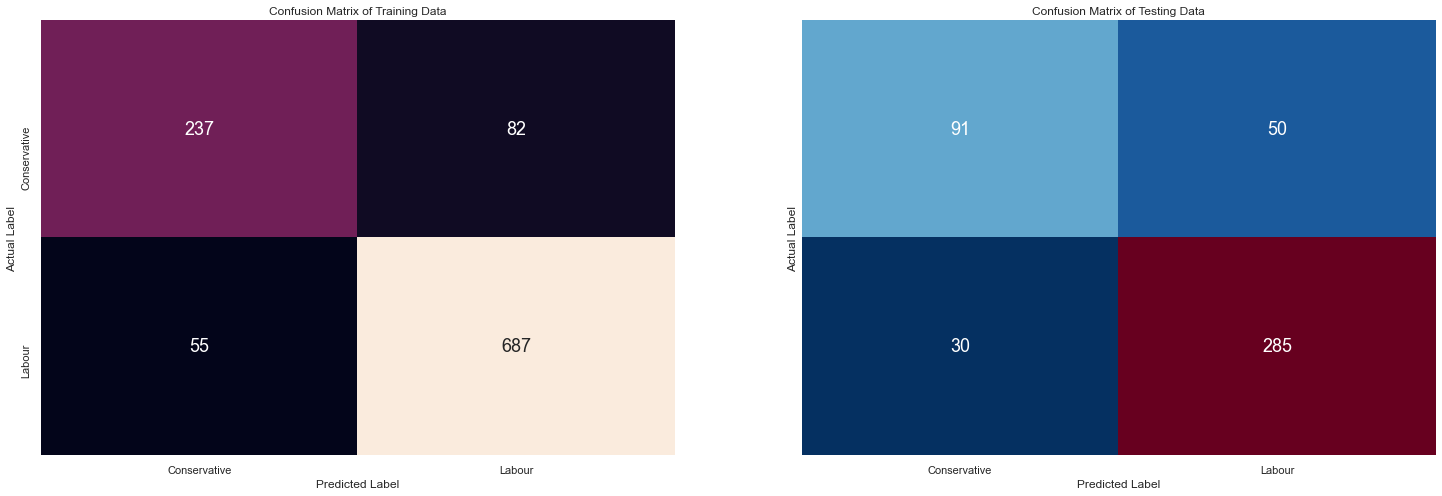

In [122]:
roc_cn(clfGB,X_test,y_test)

### Gradient Boosting Model Tuning

In [123]:
grid = { 'n_estimators' : [50,70,90],
        'max_depth' : [2],
        'learning_rate': [0.1],
        'min_samples_split':[10,20,30],
        'max_features': [3,4,5]
             }



In [124]:
grid_search = GridSearchCV(estimator = GradientBoostingClassifier(),param_grid = grid, cv = 3,verbose=True,n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [2],
                         'max_features': [3, 4, 5],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [50, 70, 90]},
             verbose=True)

In [125]:
best_grid_GB=grid_search.best_estimator_
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 5,
 'min_samples_split': 30,
 'n_estimators': 70}

In [126]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=2, max_features=5, min_samples_split=30,
                           n_estimators=70)

In [127]:
grid_search.score(X_train, y_train)

0.8557964184731386

In [128]:
grid_search.best_score_

0.8435524399417423

In [129]:
perf_metrics_train(best_grid_GB,X_train,y_train)

Training data accuracy score 0.86

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       319
           1       0.89      0.91      0.90       742

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.83      1061
weighted avg       0.85      0.86      0.85      1061



In [130]:
perf_metrics_test(best_grid_GB,X_test,y_test)

Test data accuracy score  : 0.83


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.76      0.66      0.70       141
           1       0.86      0.90      0.88       315

    accuracy                           0.83       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



ROC AUC Score - Train: 91.7 %
ROC AUC Score - Test: 88.8 %


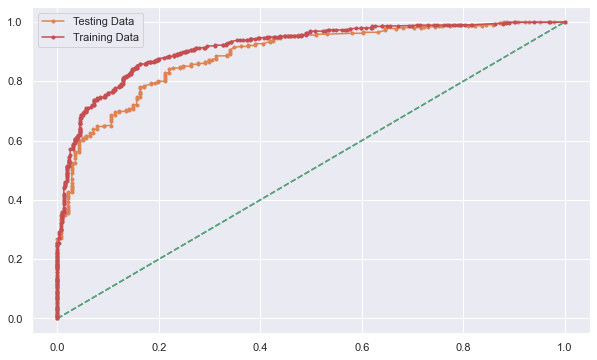

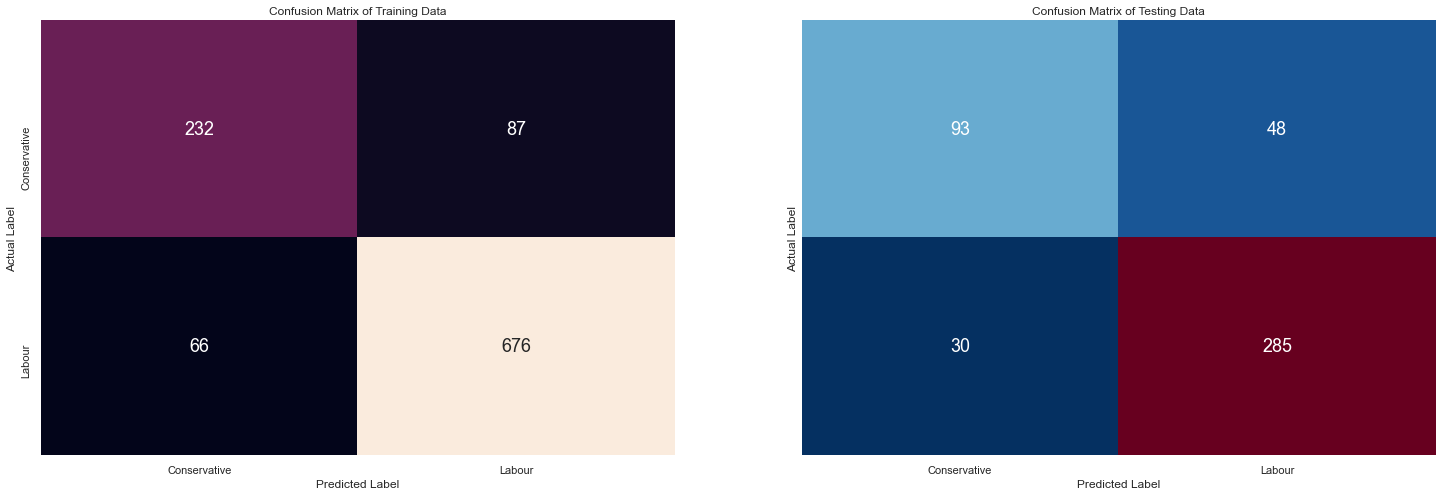

In [131]:
roc_cn(best_grid_GB,X_test,y_test)

In [132]:
pd.DataFrame((best_grid_GB.feature_importances_*100).round(2),index=X_train.columns,columns=['percentage']).sort_values('percentage',ascending=False)

,percentage
Hague,35.71
Blair,27.46
Europe,16.05
Political_Kwldg_0,9.15
Economic_Condtn_National,7.23
Political_Kwldg_2,2.99
Economic_Condtn_Household,0.64
Political_Kwldg_3,0.43
Political_Kwldg_1,0.34
Gender,0.00


In [133]:
def perf_metricsx(best_grid,X_train,y_train):
    ytrain_predict_final=best_grid.predict(X_train)
    best_score = best_grid.score(X_train, y_train)
    met=metrics.classification_report(y_train,ytrain_predict_final,output_dict=True)
    df=pd.DataFrame(met).transpose()
    score_tr=best_score.round(2)
    met_f1_tr=round(df.loc["1"][2],2)
    met_recall_tr=round(df.loc["1"][1],2)
    met_precision_tr=round(df.loc["1"][0],2)
    # predict probabilities
    probs = best_grid.predict_proba(X_train)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc_tr = metrics.roc_auc_score(y_train, probs)*100
    
    
    return(score_tr,auc_tr,met_recall_tr,met_precision_tr,met_f1_tr)

   

In [134]:
def perf_metricsx(best_grid,X_test,y_test):
    ytest_predict_final=best_grid.predict(X_test)
    best_score = best_grid.score(X_test,y_test)
    met=metrics.classification_report(y_test,ytest_predict_final,output_dict=True)
    df=pd.DataFrame(met).transpose()
    score_te=best_score.round(2)
    met_f1_te=round(df.loc["1"][2],2)
    met_recall_te=round(df.loc["1"][1],2)
    met_precision_te=round(df.loc["1"][0],2)
    # predict probabilities
    probs = best_grid.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc_test = metrics.roc_auc_score(y_test, probs)*100
    
    return(score_te,auc_test,met_recall_te,met_precision_te,met_f1_te)

   

### comparing models

In [135]:
lg_train_acc,lg_train_auc,lg_train_recall,lg_train_precision,lg_train_f1=perf_metricsx(model,X_train, y_train)
lg_test_acc,lg_test_auc,lg_test_recall,lg_test_precision,lg_test_f1=perf_metricsx(model,X_test, y_test)

lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1=perf_metricsx(model_lda,X_train, y_train)
lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1=perf_metricsx(model_lda,X_test, y_test)

knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1=perf_metricsx(model_KNN,X_train, y_train)
knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1=perf_metricsx(model_KNN,X_test, y_test)

nv_train_acc,nv_train_auc,nv_train_recall,nv_train_precision,nv_train_f1=perf_metricsx(clfGaussian,X_train, y_train)
nv_test_acc,nv_test_auc,nv_test_recall,nv_test_precision,nv_test_f1=perf_metricsx(clfGaussian,X_test, y_test)


rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1=perf_metricsx(clfRF,X_train, y_train)
rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1=perf_metricsx(clfRF,X_test, y_test)



ad_train_acc,ad_train_auc,ad_train_recall,ad_train_precision,ad_train_f1=perf_metricsx(clfADB,X_train, y_train)
ad_test_acc,ad_test_auc,ad_test_recall,ad_test_precision,ad_test_f1=perf_metricsx(clfADB,X_test, y_test)

gb_train_acc,gb_train_auc,gb_train_recall,gb_train_precision,gb_train_f1=perf_metricsx(clfGB,X_train, y_train)
gb_test_acc,gb_test_auc,gb_test_recall,gb_test_precision,gb_test_f1=perf_metricsx(clfGB,X_test, y_test)





In [136]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']


data = pd.DataFrame({'LR Train':[lg_train_acc,lg_train_auc,lg_train_recall,lg_train_precision,lg_train_f1],
        'LR Test':[lg_test_acc,lg_test_auc,lg_test_recall,lg_test_precision,lg_test_f1],
    
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
         
          'KNN Train':[  knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
            'KNN Test': [knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],        
                     
                     
               'Naive Bayes Train':     [nv_train_acc,nv_train_auc,nv_train_recall,nv_train_precision,nv_train_f1],
                'Naive Bayes Test':      [nv_test_acc,nv_test_auc,nv_test_recall,nv_test_precision,nv_test_f1],


                  'RF Train':    [rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
                    'RF Test':  [rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],

  
                     
                    'AdaBoost Train':   [ad_train_acc,ad_train_auc,ad_train_recall,ad_train_precision,ad_train_f1],
                    'AdaBoost Test':   [ad_test_acc,ad_test_auc,ad_test_recall,ad_test_precision,ad_test_f1],
                     
                      'Gradient Boost Train':   [gb_train_acc,gb_train_auc,gb_train_recall,gb_train_precision,gb_train_f1],
                    'Gradient Boost Test':   [gb_test_acc,gb_test_auc,gb_test_recall,gb_test_precision,gb_test_f1],
                     
                     
                     
                     
                     },index=index)



data.columns=pd.MultiIndex.from_arrays([['LR','LR','LDA','LDA','KNN','KNN','NB','NB','RF','RF','AdaBoost','AdaBoost','GB Train','GB Test'],['Train','Test','Train','Test','Train','Test','Train','Test','Train','Test','Train','Test','Train','Test']])
round(data,3)

LR             LDA             KNN              NB          \
            Train    Test   Train    Test   Train    Test   Train    Test   
Accuracy    0.840   0.820   0.840   0.820   0.720   0.720   0.820   0.820   
AUC        89.011  87.951  89.001  87.859  69.529  70.298  88.055  86.566   
Recall      0.920   0.910   0.910   0.900   0.990   0.990   0.870   0.890   
Precision   0.860   0.840   0.860   0.850   0.720   0.710   0.870   0.860   
F1 Score    0.890   0.870   0.890   0.880   0.830   0.830   0.870   0.870   

               RF         AdaBoost         GB Train GB Test  
            Train    Test    Train    Test    Train    Test  
Accuracy    0.970   0.780    0.840   0.820    0.870    0.82  
AUC        99.715  84.197   90.218  86.542   93.053   88.30  
Recall      0.980   0.850    0.910   0.900    0.930    0.90  
Precision   0.980   0.830    0.870   0.850    0.890    0.85  
F1 Score    0.980   0.840    0.890   0.870    0.910    0.88

### Comparing Tuned Models

In [137]:


lg_train_acc,lg_train_auc,lg_train_recall,lg_train_precision,lg_train_f1=perf_metricsx(best_model,X_train, y_train)
lg_test_acc,lg_test_auc,lg_test_recall,lg_test_precision,lg_test_f1=perf_metricsx(best_model,X_test, y_test)

lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1=perf_metricsx(lda,X_train, y_train)
lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1=perf_metricsx(lda,X_test, y_test)

knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1=perf_metricsx(best_grid_KNN,X_train, y_train)
knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1=perf_metricsx(best_grid_KNN,X_test, y_test)

nv_train_acc,nv_train_auc,nv_train_recall,nv_train_precision,nv_train_f1=perf_metricsx(clfGaussian,X_train, y_train)
nv_test_acc,nv_test_auc,nv_test_recall,nv_test_precision,nv_test_f1=perf_metricsx(clfGaussian,X_test, y_test)


rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1=perf_metricsx(best_grid_RF,X_train, y_train)
rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1=perf_metricsx(best_grid_RF,X_test, y_test)



ad_train_acc,ad_train_auc,ad_train_recall,ad_train_precision,ad_train_f1=perf_metricsx(clfADB,X_train, y_train)
ad_test_acc,ad_test_auc,ad_test_recall,ad_test_precision,ad_test_f1=perf_metricsx(clfADB,X_test, y_test)

gb_train_acc,gb_train_auc,gb_train_recall,gb_train_precision,gb_train_f1=perf_metricsx(best_grid_GB,X_train, y_train)
gb_test_acc,gb_test_auc,gb_test_recall,gb_test_precision,gb_test_f1=perf_metricsx(best_grid_GB,X_test, y_test)






In [138]:
ndex=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']


data = pd.DataFrame({'LR Train':[lg_train_acc,lg_train_auc,lg_train_recall,lg_train_precision,lg_train_f1],
        'LR Test':[lg_test_acc,lg_test_auc,lg_test_recall,lg_test_precision,lg_test_f1],
    
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
         
          'KNN Train':[  knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
            'KNN Test': [knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],        
                     
                     
               'Naive Bayes Train':     [nv_train_acc,nv_train_auc,nv_train_recall,nv_train_precision,nv_train_f1],
                'Naive Bayes Test':      [nv_test_acc,nv_test_auc,nv_test_recall,nv_test_precision,nv_test_f1],


                  'RF Train':    [rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
                    'RF Test':  [rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],

  
                     
                    'AdaBoost Train':   [ad_train_acc,ad_train_auc,ad_train_recall,ad_train_precision,ad_train_f1],
                    'AdaBoost Test':   [ad_test_acc,ad_test_auc,ad_test_recall,ad_test_precision,ad_test_f1],
                     
                      'Gradient Boost Train':   [gb_train_acc,gb_train_auc,gb_train_recall,gb_train_precision,gb_train_f1],
                    'Gradient Boost Test':   [gb_test_acc,gb_test_auc,gb_test_recall,gb_test_precision,gb_test_f1],
                     
                     
                     
                     
                     },index=index)



data.columns=pd.MultiIndex.from_arrays([['LR','LR','LDA','LDA','KNN','KNN','NB','NB','RF','RF','AdaBoost','AdaBoost','GB Train','GB Test'],['Train','Test','Train','Test','Train','Test','Train','Test','Train','Test','Train','Test','Train','Test']])
round(data,3)

LR             LDA             KNN              NB          \
            Train    Test   Train    Test   Train    Test   Train    Test   
Accuracy    0.840   0.820   0.840   0.830   0.710   0.700   0.820   0.820   
AUC        89.009  87.924  89.011  87.888  81.769  76.992  88.055  86.566   
Recall      0.920   0.910   0.910   0.900   1.000   0.990   0.870   0.890   
Precision   0.860   0.840   0.870   0.850   0.710   0.700   0.870   0.860   
F1 Score    0.890   0.870   0.890   0.880   0.830   0.820   0.870   0.870   

               RF         AdaBoost         GB Train GB Test  
            Train    Test    Train    Test    Train    Test  
Accuracy    0.860   0.820    0.840   0.820    0.860   0.830  
AUC        92.285  88.328   90.218  86.542   91.706  88.777  
Recall      0.910   0.900    0.910   0.900    0.910   0.900  
Precision   0.880   0.850    0.870   0.850    0.890   0.860  
F1 Score    0.900   0.870    0.890   0.870    0.900   0.880